#  MACHINE LEARNING: Portugal Wine under Two Class approach for Red and White classification with Logistic Regression using R and K fold cross-validation
# Module 2: Solving Project with Original Dataset (df)

By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 30, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
<hr>

# I Introduction

We consider the original dataset (wine) and we get ride off the variables "density" and "free.sulfor.dioxide" becouse they may cause problems of collinearity that can affect the normal operation of the algorithms since we are in the presence of double information.

As a consequence, we obtain the file "<b>df</b>" that goes on to represent the base with the original data pre-processed in a format ready to be used in the modeling.

# II Loading and the Data

In [117]:
# first remove ALL objects and close all possible connections
closeAllConnections()
rm(list = ls(all = TRUE)) # Does remove all inclusive hidden

# see your memory size
memory.size() 

In [1]:
# install packages and load libraries
ipak <- function(pkg){
    new.pkg <- pkg[!(pkg %in% installed.packages()[, "Package"])]
    if (length(new.pkg)) 
        install.packages(new.pkg, dependencies = c("Depends", "Suggests"))
    sapply(pkg, require, character.only = TRUE)
}
# usage
packages <- c("plyr", "dplyr", "car", "caret")
ipak(packages)


Loading required package: plyr
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: car
Warning message:
"package 'car' was built under R version 3.4.2"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2


plyr dplyr   car caret 
 TRUE  TRUE  TRUE  TRUE

In [82]:
# define path location of datasets
wine1.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine2.url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# read datasets
wine1 <- read.csv(wine1.url, header=TRUE, sep=';')
wine2 <- read.csv(wine2.url, header=TRUE, sep=';')

# create dataset base
paso <- rbind(cbind(wine1, Class='white'), cbind(wine2, Class='red'))
#paso$quality<- ifelse(paso$quality>=6, "Good", ifelse(paso$quality<6, "Bad", NA))

df= subset(paso, select=c('fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides' ,'total.sulfur.dioxide','pH', 'sulphates', 'alcohol', 'quality', 'Class'))
attach(df)
head(df)
rm("paso", "wine1", "wine2")

The following objects are masked from df (pos = 5):

    alcohol, chlorides, citric.acid, Class, fixed.acidity, pH, quality,
    residual.sugar, sulphates, total.sulfur.dioxide, volatile.acidity

The following objects are masked from df (pos = 6):

    alcohol, chlorides, citric.acid, Class, fixed.acidity, pH, quality,
    residual.sugar, sulphates, total.sulfur.dioxide, volatile.acidity



fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,white
6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,6,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white


In [141]:
# verify response variable "Class" as factor
df$Class <- as.factor(df$Class)

In [142]:
# get some information about the dataset
str(df)

'data.frame':	6497 obs. of  11 variables:
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


# III Getting train and test datasets

In [86]:
#stratified sampling to get the train and test dataset
set.seed(7) # Set Seed so that same sample can be reproduced in future also
# considering response variable as strata
data_part <- createDataPartition(y = df$Class ,  p = 0.70, list = F)
testing <- df[-data_part,] # 30% data goes here
training <- df[data_part,] # 70% here

In [87]:
#taking a look of the train and test dataset by columns 
head(training)
head(testing)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
2,6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,6,white
3,8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white
7,6.2,0.32,0.16,7.0,0.045,136,3.18,0.47,9.6,6,white
8,7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,white
9,6.3,0.30,0.34,1.6,0.049,132,3.30,0.49,9.5,6,white
10,8.1,0.22,0.43,1.5,0.044,129,3.22,0.45,11.0,6,white


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class
1,7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,white
4,7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
5,7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white
6,8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white
18,6.2,0.66,0.48,1.2,0.029,75,3.33,0.39,12.8,8,white
20,6.5,0.31,0.14,7.5,0.044,133,3.22,0.50,9.5,5,white


In [88]:
# get some information about training dataset
str(training[,1:11])

'data.frame':	4549 obs. of  11 variables:
 $ fixed.acidity       : num  6.3 8.1 6.2 7 6.3 8.1 8.1 8.6 7.9 6.6 ...
 $ volatile.acidity    : num  0.3 0.28 0.32 0.27 0.3 0.22 0.27 0.23 0.18 0.16 ...
 $ citric.acid         : num  0.34 0.4 0.16 0.36 0.34 0.43 0.41 0.4 0.37 0.4 ...
 $ residual.sugar      : num  1.6 6.9 7 20.7 1.6 1.5 1.45 4.2 1.2 1.5 ...
 $ chlorides           : num  0.049 0.05 0.045 0.045 0.049 0.044 0.033 0.035 0.04 0.044 ...
 $ total.sulfur.dioxide: num  132 97 136 170 132 129 63 109 75 143 ...
 $ pH                  : num  3.3 3.26 3.18 3 3.3 3.22 2.99 3.14 3.18 3.54 ...
 $ sulphates           : num  0.49 0.44 0.47 0.45 0.49 0.45 0.56 0.53 0.63 0.52 ...
 $ alcohol             : num  9.5 10.1 9.6 8.8 9.5 11 12 9.7 10.8 12.4 ...
 $ quality             : int  6 6 6 6 6 6 5 5 5 7 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [89]:
# get some information about testing dataset
str(testing[,1:11])

'data.frame':	1948 obs. of  11 variables:
 $ fixed.acidity       : num  7 7.2 7.2 8.1 6.2 6.5 6.8 6.6 7.2 6.2 ...
 $ volatile.acidity    : num  0.27 0.23 0.23 0.28 0.66 0.31 0.26 0.27 0.32 0.12 ...
 $ citric.acid         : num  0.36 0.32 0.32 0.4 0.48 0.14 0.42 0.41 0.36 0.34 ...
 $ residual.sugar      : num  20.7 8.5 8.5 6.9 1.2 7.5 1.7 1.3 2 1.5 ...
 $ chlorides           : num  0.045 0.058 0.058 0.05 0.029 0.044 0.049 0.052 0.033 0.045 ...
 $ total.sulfur.dioxide: num  170 186 186 97 75 133 122 142 114 117 ...
 $ pH                  : num  3 3.19 3.19 3.26 3.33 3.22 3.47 3.42 3.1 3.42 ...
 $ sulphates           : num  0.45 0.4 0.4 0.44 0.39 0.5 0.48 0.47 0.71 0.51 ...
 $ alcohol             : num  8.8 9.9 9.9 10.1 12.8 9.5 10.5 10 12.3 9 ...
 $ quality             : int  6 6 6 6 8 5 8 6 7 6 ...
 $ Class               : Factor w/ 2 levels "white","red": 1 1 1 1 1 1 1 1 1 1 ...


In [90]:
#summarize full dataset by columns 
propmiss <- function(dataframe) {
	m <- sapply(dataframe, function(x) {
		data.frame(
			n=length(!is.na(x)), 
			nmiss=sum(is.na(x)), 
			propmiss=sum(is.na(x))/length(x),
			P25=round(quantile(x, 0.25, na.rm=TRUE),2),
			P75=round(quantile(x, 0.75, na.rm=TRUE),2),            
			IQR=round(IQR(x, na.rm=TRUE),2),
			Threshold= round(quantile(x, 0.75, na.rm=TRUE),2) + 1.5*round(IQR(x, na.rm=TRUE),2),            
			Minimum=round(min(x, na.rm=TRUE),2),
			Median=round(median(x, na.rm=TRUE),2),            
			Maximum=round(max(x, na.rm=TRUE),2),
			Range=round(max(x, na.rm=TRUE)-min(x, na.rm=TRUE),2),
			Mean=round(mean(x, na.rm=TRUE),2),
			StDev=round(sd(x, na.rm=TRUE),2)
		)
	})
	d <- data.frame(t(m))
	d <- sapply(d, unlist)
	d <- as.data.frame(d)
	d$variable <- row.names(d)
	row.names(d) <- NULL
	d <- cbind(d[ncol(d)],d[-ncol(d)])
	return(d[order(d$propmiss), ])
}

In [91]:
# summarize training dataset
(summary=propmiss(training[,-11])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,4549,6.40,7.60,1.20,4.20,7.00,15.90,11.70,7.20,1.27
volatile.acidity,4549,0.23,0.41,0.18,0.08,0.30,1.58,1.50,0.34,0.17
citric.acid,4549,0.24,0.39,0.15,0.00,0.31,1.66,1.66,0.32,0.14
residual.sugar,4549,1.80,8.10,6.30,0.60,2.90,65.80,65.20,5.43,4.79
chlorides,4549,0.04,0.06,0.03,0.01,0.05,0.61,0.60,0.06,0.04
total.sulfur.dioxide,4549,78.00,156.00,78.00,6.00,119.00,440.00,434.00,116.16,56.48
pH,4549,3.11,3.32,0.21,2.72,3.20,4.01,1.29,3.22,0.16
sulphates,4549,0.43,0.60,0.17,0.22,0.51,2.00,1.78,0.53,0.15
alcohol,4549,9.50,11.30,1.80,8.00,10.30,14.90,6.90,10.50,1.19
quality,4549,5.00,6.00,1.00,3.00,6.00,9.00,6.00,5.82,0.88


In [92]:
# summarize testing dataset
(summary=propmiss(testing[,-11])[,-(3:4)][,-6])

variable,n,P25,P75,IQR,Minimum,Median,Maximum,Range,Mean,StDev
fixed.acidity,1948,6.40,7.80,1.40,3.80,7.00,15.60,11.80,7.26,1.35
volatile.acidity,1948,0.23,0.40,0.17,0.08,0.29,1.33,1.25,0.33,0.16
citric.acid,1948,0.25,0.40,0.15,0.00,0.31,1.00,1.00,0.32,0.15
residual.sugar,1948,1.80,8.10,6.30,0.60,3.20,22.60,22.00,5.47,4.69
chlorides,1948,0.04,0.06,0.03,0.01,0.05,0.47,0.46,0.06,0.03
total.sulfur.dioxide,1948,75.75,155.00,79.25,6.00,117.00,344.00,338.00,114.77,56.62
pH,1948,3.10,3.32,0.22,2.79,3.21,3.90,1.11,3.22,0.16
sulphates,1948,0.43,0.60,0.17,0.25,0.50,1.56,1.31,0.53,0.15
alcohol,1948,9.50,11.30,1.80,8.00,10.30,14.05,6.05,10.47,1.20
quality,1948,5.00,6.00,1.00,3.00,6.00,9.00,6.00,5.82,0.85


# IV Logistic Regression
 
In this project I have considered Logistic Regression algorithm. I use "set.seed(7)" so that same sample can be reproduced in the future and also it ensures the results are directly comparable.

## 41 Building Machine Learning Model

### 411 Find model equation 

In [107]:
## full model
names(training)
model1<- glm(Class ~ ., data=training, family="binomial")
summary(model1)

[1] "fixed.acidity"        "volatile.acidity"     "citric.acid"         
 [4] "residual.sugar"       "chlorides"            "total.sulfur.dioxide"
 [7] "pH"                   "sulphates"            "alcohol"             
[10] "quality"              "Class"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


Call:
glm(formula = Class ~ ., family = "binomial", data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8451  -0.0374  -0.0097  -0.0003   4.4663  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -49.188736   4.899808 -10.039  < 2e-16 ***
fixed.acidity          1.617783   0.188645   8.576  < 2e-16 ***
volatile.acidity      11.719671   1.125829  10.410  < 2e-16 ***
citric.acid           -2.373047   1.251969  -1.895  0.05803 .  
residual.sugar        -0.110101   0.046975  -2.344  0.01909 *  
chlorides             41.428951   4.639321   8.930  < 2e-16 ***
total.sulfur.dioxide  -0.060189   0.004673 -12.879  < 2e-16 ***
pH                    10.300760   1.084779   9.496  < 2e-16 ***
sulphates              9.798944   1.199620   8.168 3.13e-16 ***
alcohol               -0.454528   0.157893  -2.879  0.00399 ** 
quality                0.227110   0.186065   1.221  0.22224    
---
Signif. codes:  0 '***' 0.001

In [108]:
# VIF variable inflation factor for each variable in the model
vif(model1)

fixed.acidity     volatile.acidity          citric.acid 
            2.157342             1.866180             1.694751 
      residual.sugar            chlorides total.sulfur.dioxide 
            1.090513             1.471736             1.604837 
                  pH            sulphates              alcohol 
            1.881629             1.352152             1.852170 
             quality 
            1.610999

VIF >= 10 ==> variable is collinear and should be omitted from the model. 

So,  VIF < 10 for all variables ==> variables are ok and should be kept on the model. 

In [118]:
# best model Stepwise backward-AIC
model2<- step(glm(Class ~ ., family = binomial, data=training), trace= F, direction="backward", k=2)
summary(model2)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess


Call:
glm(formula = Class ~ fixed.acidity + volatile.acidity + citric.acid + 
    residual.sugar + chlorides + total.sulfur.dioxide + pH + 
    sulphates + alcohol, family = binomial, data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8655  -0.0367  -0.0095  -0.0003   4.4398  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -48.962936   4.915291  -9.961  < 2e-16 ***
fixed.acidity          1.629273   0.188888   8.626  < 2e-16 ***
volatile.acidity      11.209315   1.028209  10.902  < 2e-16 ***
citric.acid           -2.465382   1.246617  -1.978  0.04797 *  
residual.sugar        -0.107447   0.047916  -2.242  0.02494 *  
chlorides             41.614606   4.651114   8.947  < 2e-16 ***
total.sulfur.dioxide  -0.059911   0.004626 -12.950  < 2e-16 ***
pH                    10.383193   1.085275   9.567  < 2e-16 ***
sulphates              9.936719   1.212884   8.193 2.56e-16 ***
alcohol               -0.3796

In [119]:
# VIF variable inflation factor for each variable in the model
vif(model2)

fixed.acidity     volatile.acidity          citric.acid 
            2.189528             1.556191             1.705222 
      residual.sugar            chlorides total.sulfur.dioxide 
            1.090941             1.483638             1.622013 
                  pH            sulphates              alcohol 
            1.900665             1.353352             1.555534

VIF >= 10 ==> variable is collinear and should be omitted from the model. 

So,  VIF < 6 for all variables ==> variables are ok and should be kept on the model. 

In [120]:
## best model Stepwise backward-BIC
model3<- step(glm(Class ~ ., family = binomial(link = "logit"), data=training), trace= F, direction="backward", k=log(nrow(training)))
summary(model3)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess


Call:
glm(formula = Class ~ fixed.acidity + volatile.acidity + residual.sugar + 
    chlorides + total.sulfur.dioxide + pH + sulphates + alcohol, 
    family = binomial(link = "logit"), data = training)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9781  -0.0365  -0.0094  -0.0003   4.4955  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -48.883248   4.865734 -10.046  < 2e-16 ***
fixed.acidity          1.492970   0.172129   8.674  < 2e-16 ***
volatile.acidity      12.043998   0.956135  12.597  < 2e-16 ***
residual.sugar        -0.114265   0.042892  -2.664  0.00772 ** 
chlorides             38.934863   4.233995   9.196  < 2e-16 ***
total.sulfur.dioxide  -0.060831   0.004575 -13.295  < 2e-16 ***
pH                    10.586327   1.079422   9.807  < 2e-16 ***
sulphates              9.856996   1.199222   8.219  < 2e-16 ***
alcohol               -0.428291   0.141182  -3.034  0.00242 ** 
---
Signif. codes:  0 '***'

In [121]:
# VIF variable inflation factor for each variable in the model
vif(model3)

fixed.acidity     volatile.acidity       residual.sugar 
            1.827078             1.331502             1.085292 
           chlorides total.sulfur.dioxide                   pH 
            1.353144             1.588131             1.885926 
           sulphates              alcohol 
            1.341218             1.537775

VIF >= 10 ==> variable is collinear and should be omitted from the model. 

So,  VIF < 10 for all variables ==> variables are ok and should be kept on the model. 

As we can see, Model2 (backward-AIC) has achieved a lower AIC value (model2-AIC= 389.67) being the best model according to the Stepwise method. Also, we can compare the models using the ANOVA test. Let's say our null hypothesis is that second model is better than the first model. p < 0.05 would reject our hypothesis and in case p > 0.05, we'll fail to reject the null hypothesis.

In [122]:
#compare the models by using anova-chisq
anova(model1,model2,test = "Chisq")
anova(model1,model3,test = "Chisq")
anova(model2,model3,test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4538,368.1740,NA,NA,NA
4539,369.6733,-1,-1.49924,0.2207884


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4538,368.1740,NA,NA,NA
4540,373.7131,-2,-5.539069,0.06269119


Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
4539,369.6733,NA,NA,NA
4540,373.7131,-1,-4.039829,0.04443833


In [123]:
#compare the models by using lrtest-chisq
library(lmtest)
lrtest(model1, model2)
lrtest(model1, model3)
lrtest(model2,model3)

#Df,LogLik,Df,Chisq,Pr(>Chisq)
11,-184.0870,NA,NA,NA
10,-184.8366,-1,1.49924,0.2207884


#Df,LogLik,Df,Chisq,Pr(>Chisq)
11,-184.0870,NA,NA,NA
9,-186.8565,-2,5.539069,0.06269119


#Df,LogLik,Df,Chisq,Pr(>Chisq)
10,-184.8366,NA,NA,NA
9,-186.8565,-1,4.039829,0.04443833


With p > 0.05, both test (ANOVA and LRTEST) also corroborates the fact that the second model (model2) is the best model according to the Stepwise method.  So, we will keep model2 and we will evaluate its performance as a supervised machine learning model.  

### 412 Building the model 

In [124]:
## Control Resampling Technique: 10-fold CV
fiveStats = function(...) c (twoClassSummary(...), defaultSummary(...))
cvCtrl <- trainControl(method = "cv", number=10,  summaryFunction = fiveStats, classProbs = TRUE, savePredictions=T)

In [125]:
## Construction Predictive Model
set.seed(1)
formula2 <- as.formula("Class ~ fixed.acidity + volatile.acidity + citric.acid + residual.sugar + chlorides + total.sulfur.dioxide + pH + sulphates + alcohol")
lrmodel2 <- train(formula2, data=training, method="glm",   family=binomial, preProc = c("center", "scale"), tuneLength = 5, trControl = cvCtrl)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [126]:
## Getting summary of fitted model2
summary(lrmodel2)


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8655  -0.0367  -0.0095  -0.0003   4.4398  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)           -4.6757     0.2923 -15.996  < 2e-16 ***
fixed.acidity          2.0752     0.2406   8.626  < 2e-16 ***
volatile.acidity       1.8560     0.1702  10.902  < 2e-16 ***
citric.acid           -0.3574     0.1807  -1.978  0.04797 *  
residual.sugar        -0.5143     0.2294  -2.242  0.02494 *  
chlorides              1.4832     0.1658   8.947  < 2e-16 ***
total.sulfur.dioxide  -3.3837     0.2613 -12.950  < 2e-16 ***
pH                     1.6723     0.1748   9.567  < 2e-16 ***
sulphates              1.4874     0.1816   8.193 2.56e-16 ***
alcohol               -0.4514     0.1724  -2.619  0.00883 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5077.87  on 4548  degrees of fre

In [133]:
## train results model2
lrmodel2

Generalized Linear Model 

4549 samples
   9 predictor
   2 classes: 'white', 'red' 

Pre-processing: centered (9), scaled (9) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4094, 4094, 4095, 4094, 4094, 4094, ... 
Resampling results:

  ROC        Sens       Spec       Accuracy   Kappa    
  0.9965696  0.9932928  0.9714286  0.9879092  0.9673185


In [134]:
## Test Set Results model2
lrPred2 <- predict(lrmodel2,testing, type="raw")
confusionMatrix(lrPred2, testing$Class, positive = "white")

Confusion Matrix and Statistics

          Reference
Prediction white  red
     white  1459   13
     red      10  466
                                          
               Accuracy : 0.9882          
                 95% CI : (0.9823, 0.9925)
    No Information Rate : 0.7541          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9681          
 Mcnemar's Test P-Value : 0.6767          
                                          
            Sensitivity : 0.9932          
            Specificity : 0.9729          
         Pos Pred Value : 0.9912          
         Neg Pred Value : 0.9790          
             Prevalence : 0.7541          
         Detection Rate : 0.7490          
   Detection Prevalence : 0.7556          
      Balanced Accuracy : 0.9830          
                                          
       'Positive' Class : white           
                                          

In [135]:
## Predicting Class Probabilities model2
lrProbs2 <- predict(lrmodel2, testing, type = "prob")
head(lrProbs2)

,white,red
1,0.9999988,1.150366e-06
4,0.9999921,7.907188e-06
5,0.9999921,7.907188e-06
6,0.9758426,2.415741e-02
18,0.9220521,7.794794e-02
20,0.9993833,6.166798e-04


In [136]:
# variable importance model2
lr.imp2 = varImp (lrmodel2 , scale = F )
lr.imp2

glm variable importance

                     Overall
total.sulfur.dioxide  12.950
volatile.acidity      10.902
pH                     9.567
chlorides              8.947
fixed.acidity          8.626
sulphates              8.193
alcohol                2.619
residual.sugar         2.242
citric.acid            1.978

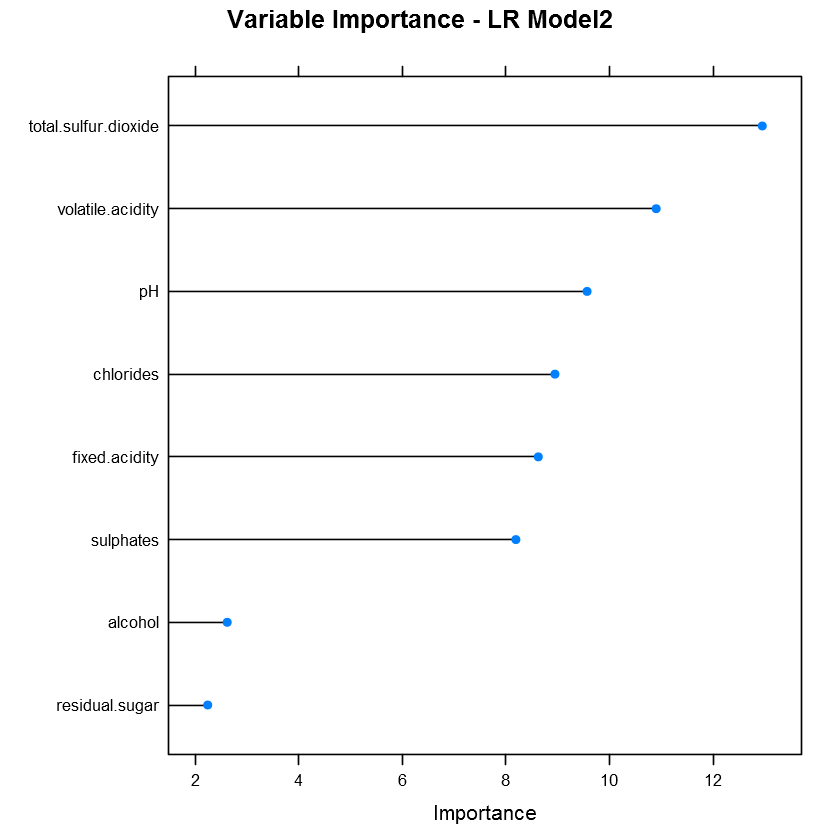

In [137]:
## Graphic variable importance model2
# dev.new()
plot(lr.imp2, top=8, main="Variable Importance - LR Model2")

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

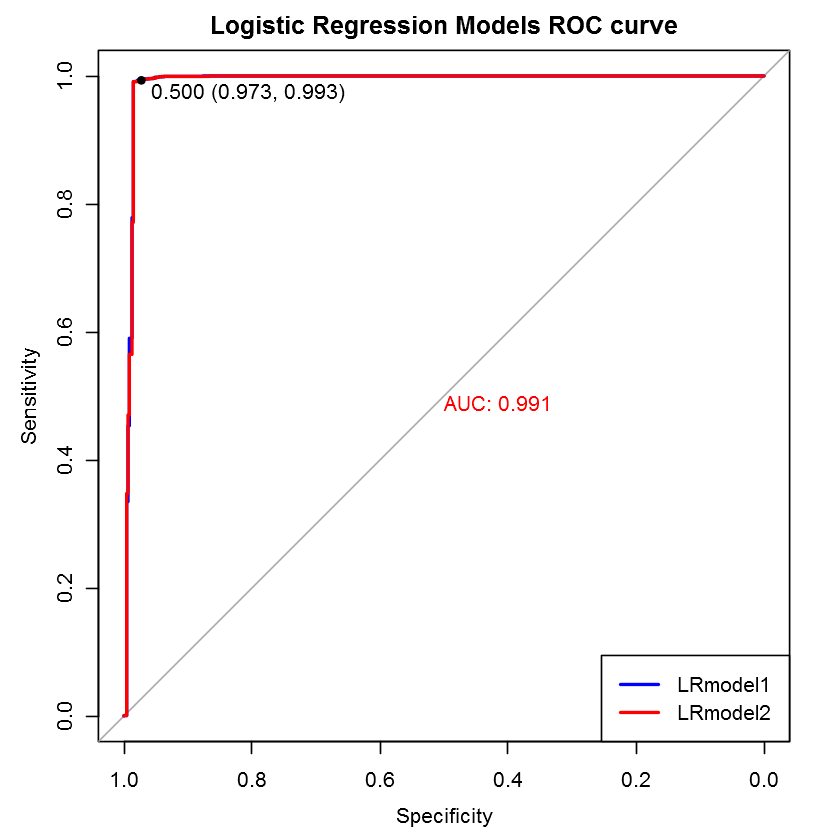

In [138]:
## Creating the ROC Curve
library(pROC)
formula1 <- as.formula("Class ~ .") 
lrmodel1 <- train(formula1, data=training, method="glm",   family=binomial, preProc = c("center", "scale"), tuneLength = 5, trControl = cvCtrl)
lrProbs <- predict(lrmodel1, testing, type = "prob")

## Creating the ROC Curve
library(pROC)
lrROC <- roc(predictor = lrProbs$white, response = testing$Class, levels = rev(levels(testing$Class)))
lrROC2 <- roc(predictor = lrProbs2$white, response = testing$Class, levels = rev(levels(testing$Class)))

plot(lrROC, type = "S", main="Logistic Regression Models ROC curve",  col = "blue")
plot(lrROC2, add = TRUE, print.thres = .5, col = "red", print.auc=TRUE)
#plot(knnROC, add = TRUE, col = "yellow")
#plot(rfROC, add = TRUE, print.thres = .5, col = "blue", print.auc=TRUE)
legend("bottomright", legend = c("LRmodel1","LRmodel2"), col = c("blue","red"),lwd = 2)


## V Making predictions
 
After doing all the building stuff,  we want to get the predictions from model2 on our training dataset.

In [139]:
# print predictions probabilities by row model2
head(as.data.frame(lrProbs2),5)

,white,red
1,0.9999988,1.150366e-06
4,0.9999921,7.907188e-06
5,0.9999921,7.907188e-06
6,0.9758426,2.415741e-02
18,0.9220521,7.794794e-02


In [140]:
# print validation dataset and predictions by row model2
head((val<-as.data.frame(c(testing,as.data.frame(lrPred2)))),10)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,total.sulfur.dioxide,pH,sulphates,alcohol,quality,Class,lrPred2
7.0,0.27,0.36,20.7,0.045,170,3.00,0.45,8.8,6,white,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white,white
7.2,0.23,0.32,8.5,0.058,186,3.19,0.40,9.9,6,white,white
8.1,0.28,0.40,6.9,0.050,97,3.26,0.44,10.1,6,white,white
6.2,0.66,0.48,1.2,0.029,75,3.33,0.39,12.8,8,white,white
6.5,0.31,0.14,7.5,0.044,133,3.22,0.50,9.5,5,white,white
6.8,0.26,0.42,1.7,0.049,122,3.47,0.48,10.5,8,white,white
6.6,0.27,0.41,1.3,0.052,142,3.42,0.47,10.0,6,white,white
7.2,0.32,0.36,2.0,0.033,114,3.10,0.71,12.3,7,white,white
6.2,0.12,0.34,1.5,0.045,117,3.42,0.51,9.0,6,white,white


Now if you want to get the predictions from a new test data, you can see the item 7.4 of my project [MACHINE LEARNING: A comparison of supervised learning algorithms applied to the classification problem with caret R-project library](http://nbviewer.jupyter.org/github/arqmain/Machine_Learning/blob/master/R_MLearning/MLearning_Classification_Comparison_R_Caret/MLearning_Classification_Comparison_R_Caret.ipynb). 

## VI Conclusion

This module of the project develops Logistic Regression algorithm of machine learning to classify the Class of the wine "White" or "Red" according to the 11 variables that characterize the wine subject to classification.

The database -df- does not consider two variables that appear in the original base. They could generate a problem of multicollinearity in the process of classification. So, we got rid of them in df.

The lrmodel2 achieves a good classification metric, reaching ROC measurement of 99.66%. That is, the variables of the "df" database allow discriminating in a good way the Class of wine that they represent.

The model was developed selecting the variables included by using the stepwise backward elimination method based on AIC selection criterion. Anyway, this is modeling so, we may improve more or not the model by filtering other variables, incorporating variable's interactions or using another variable's selection method.

<hr>
By: Hector Alvaro Rojas | Data Science, Visualizations and Applied Statistics | October 30, 2017<br>
Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]